In [1]:
#For Finding free ligand concentrations
def func_find_free_ligand(Mtot, Ltot, M, n):
    
    #print(M)
    M = np.array(M)
    #print(M)
    
    #print(Ltot)
    Ltot = np.array(Ltot)
    #print(Ltot)
    
    L = Ltot - n*(Mtot - M)
    
    #print(L)
    
    return L



#Defines the 1 to n model function:
def func_1_to_n_Hill_Langmuir(L, Kd, n):
    
    #Fraction bound for macromolecule (bound macromolecule/total macromolecule)
    theta = (L**n)/(Kd + (L**n))    
    
    return theta


#Defines Function to prepare, process and plot the data
def func_prep_proc_plot(x,Protein_name,y,SD,Macromolecule_name,Total_Macromolecule_concentration,n,Concentration_unit,plot):
    
    #Finds concentration of free Ligand (L)
    L = func_find_free_ligand(Total_Macromolecule_concentration, x, free, n)

    #Converting data and standard deviation to numpy arrays
    #print(y)
    theta = np.array(y)
    #print(SD)
    SD = np.array(SD)
    #print(SD)
    #SD = None # if not using SD when fitting data

    #Finding parameters using regression model
    #KD, _ = opt.curve_fit(func_1_to_n_Hill_Langmuir, L, theta, sigma=None);

    #Finding parameters using regression model
    KD, _ = opt.curve_fit(lambda L, Kd:func_1_to_n_Hill_Langmuir(L, Kd, n=n), L, theta, sigma=SD);  
    #here we use a lambda function to be able to pass number of binding sites/hill coefficient (n) as a constant for the data fitting
    #For example:
    #curve_fit(lambda x, a: func(x, a, b), x1, x2)
    #Where:  x is the independent variable, a is the parameter found through the curve fit,
    #b is the constant that will be passed in, x1 is the vector that contains the values for the independent variable,
    #and x2 is the vector that contains the values for the dependent variable

    #KD, _ = opt.curve_fit(func_1_to_1, x, y, sigma=None);

    #Applying parameters to fit the data
    theta_fit = func_1_to_n_Hill_Langmuir(L, KD, n)

    #print(theta_fit)

    #Calculates the Residual Sum of Squares (RSS) as an error estimate
    #Creates helpful counter for the sum and RSS
    i_sum = 0
    RSS = 0
    for element in theta_fit:
        #calculates this square
        this_square = (element - theta[i_sum])**2
        #moves counter to next iteration
        i_sum = i_sum + 1        
        #updates RSS
        RSS = RSS + this_square
        #print(RSS)


    # Step 1 : Get the residuals for fitting
    residuals = theta - theta_fit

    # Step 2 : Get the sum of squares of residual
    squaresumofresiduals = np.sum(residuals**2)

    # Step 3 : Get the total sum of squares using the mean of y values
    squaresum = np.sum((theta-np.mean(theta))**2)

    # Step 4 : Get the R^2 
    R2 = 1 - (squaresumofresiduals/squaresum)


    #Standard deviation of fitted parameter
    standarddevparams = np.sqrt(np.diag(_))
    #print(standarddevparams)

    if plot == 'yes':

        print("The calculated KD is: " + str(KD).strip("][") +" +- "+str(standarddevparams[0])+ Concentration_unit)

        print("RSS: " + str(RSS))

        print("R2: " + str(R2))


        #Plotting results
        #plt.errorbar(L, theta, yerr=SD, fmt='o');#, x, y_fit, 'b');
        #plt.plot(L, theta_fit, 'black');
        #plt.ylim(-0.1,1.1)

        plt.plot(L, theta, 'o', L, theta_fit, 'b');

        #axs[0, 0].plot(x, y, 'o' , markersize=10);
        #axs[0, 0].plot(x, y_fit, 'b', linewidth=3);
        plt.grid();
        #axs[0, 0].legend(['Data', '4PL Regression'], fontsize=22);
        plt.xlabel('Free Protein Concentration ('+Concentration_unit+')', fontsize=15);
        plt.ylabel('Fraction Bound', fontsize=15);
        plt.title('Binding Curve for '+Protein_name+" and "+Macromolecule_name+' ['+str(Total_Macromolecule_concentration)+' '+Concentration_unit+']'+' with n='+str(n), fontsize=20);
        plt.show()
    
    return R2



C:\Users\leogd\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


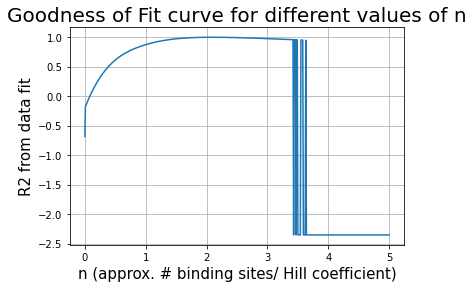

Best n is:2.0899999999999994


The calculated KD is: 1.48373605e+08 +- 10288923.046928743nM
RSS: 0.005663723786509775
R2: 0.9962825598667526


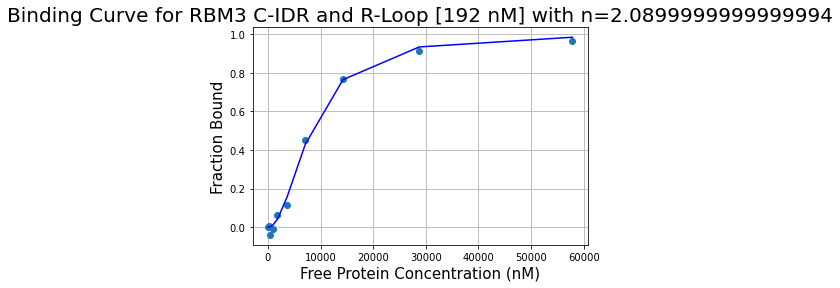

In [2]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
import math

# ==================================================================================================== #
#Input your data:

#Total Ligand (Protein) Concentration
x = [0,227.4822266,454.9644531,909.9289063,1819.857813,3639.715625,7279.43125,14558.8625,29117.725,58235.45]

Protein_name = "RBM3 C-IDR"

#Free Macromolecule Concentration 
free = [192,190.6949797,199.7599928,193.5922466,179.9339516,169.6213736,104.996371,44.79062412,17.29722628,7.219597772]


#Fraction Bound (theta)
y = [0,0.006796981,-0.040416629,-0.008292951,0.062844002,0.116555346,0.453143901,0.766715499,0.90991028,0.962397928]

Macromolecule_name = "R-Loop" 

Total_Macromolecule_concentration = 192

initial_n = 0
n_step = 0.01
final_n = 5

Concentration_unit = 'nM'

#Standard Deviation

SD = [0.00000000000000000000000001,0.077765703,0.004734589,0.036079198,0.025085648,0.040536906,0.084582057,0.003719619,0.008555978,0.006019037]

# ==================================================================================================== #



#Testing different values for n

#Python vectors to store previous results
n_vector = []
R2_vector = []

#Loop to fit the data with different values for n
while initial_n <= final_n:
    R2 = func_prep_proc_plot(x,Protein_name,y,SD,Macromolecule_name,Total_Macromolecule_concentration,initial_n,Concentration_unit,plot='no')
    
    n_vector.append(initial_n)
    R2_vector.append(R2)
    
    initial_n = initial_n + n_step

#Plotting Goodness of fit values
plt.plot(n_vector, R2_vector);

plt.grid();
plt.xlabel('n (approx. # binding sites/ Hill coefficient)', fontsize=15);
plt.ylabel('R2 from data fit', fontsize=15);
plt.title('Goodness of Fit curve for different values of n', fontsize=20);
plt.show()

#Variables for max R2 and corresponding n
max_n = 0
R2_max = max(R2_vector)

#Helpful counter
i = 0

#Loop to select best n using max R2:
while i < len(R2_vector):
    
    if R2_vector[i] == R2_max:
        max_n = n_vector[i]   
    
    i = i + 1
    
print('Best n is:'+str(max_n)+'\n'+'\n')

#Applying best n to fit data one last time and plot it
func_prep_proc_plot(x,Protein_name,y,SD,Macromolecule_name,Total_Macromolecule_concentration,max_n,Concentration_unit,plot='yes');